In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error
import torch
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss, MAE

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_forecasting\models\base\_base_model.py:28: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
df = pd.read_csv('data/BTC-USD_training_data_data.csv',index_col='Date',parse_dates=['Date'])
df = df.sort_index()  
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [5]:
def plot_pred(test,pred):
    plt.plot(test, color='r',label='Actual Bitcoin price')
    plt.plot(pred, color='b',label='predicted Bitcoin price')
    plt.title('pedicted Bitcoin price')
    plt.xlabel('time')
    plt.ylabel('Bitcoin price')
    plt.legend()
    plt.show()
    
def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test,pred))
    print('Root MSE = {}.'.format(rmse))

In [6]:
train_set = df[:'2020'].iloc[:,1:2].values
test_set = df['2021':].iloc[:,1:2].values

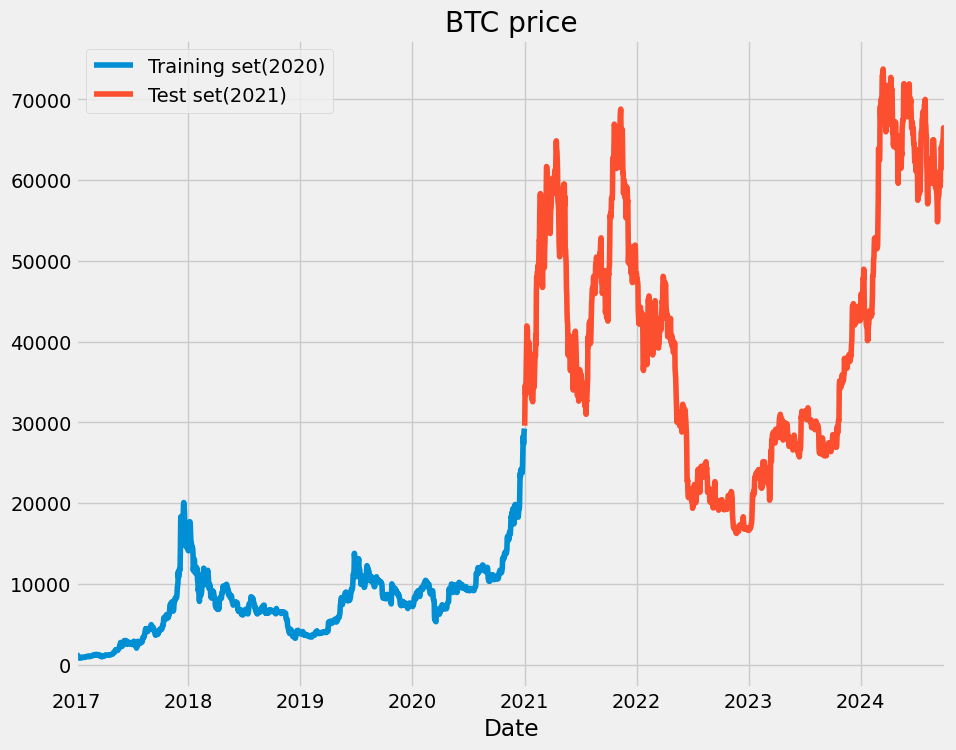

In [7]:
df['High'][:'2020'].plot(figsize=(10,8),legend=True)
df['High']['2021':].plot(figsize=(10,8),legend=True)
plt.legend(['Training set(2020)','Test set(2021)'])
plt.title('BTC price')
plt.show()

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

In [9]:
train_set_sc.shape

(1461, 1)

In [10]:
x_train = []
y_train = []
for i in range(60,1461):
    x_train.append(train_set_sc[i-60:i,0])
    y_train.append(train_set_sc[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
# LSTM
model_lstm = Sequential()

#1
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.2))

#2
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#3
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#4
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))

#Output
model_lstm.add(Dense(units=1))

#Compile RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')

#Fit training set
model_lstm.fit(x_train,y_train,epochs=20,batch_size=32)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.0104
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0061
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0043
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0041
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0039
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0032
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0033
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0027
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0026
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0024
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0024
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 0.0022
Epoch 13/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0022
Epoch 14/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0022
Epoch 15/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0019
Ep

In [13]:
df_total = pd.concat((df['High'][:'2020'],df['High']['2021':]),axis=0)
inputs = df_total[len(df_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(1435, 1)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


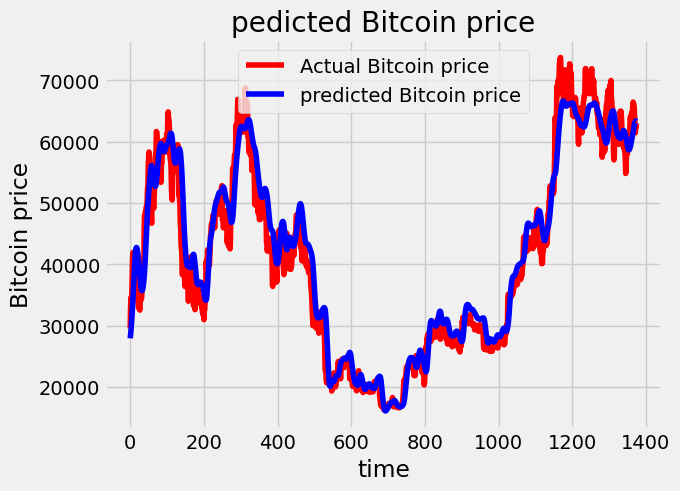

In [57]:
x_test=[]
for i in range(60,1435):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga = model_lstm.predict(x_test)
pred_harga = sc.inverse_transform(pred_harga)
plot_pred(test_set,pred_harga)

In [58]:
return_rmse(test_set,pred_harga)

Root MSE = 3611.581654275707.


In [59]:
model_lstm.save('models/model.h5')

In [ ]:


df['time_idx'] = range(len(df))
df['group'] = 'BTC'
df['target'] = df['High']

# Select only the columns needed
data = df[['time_idx', 'group', 'target']].copy()

print(data.head())

# Split into train and validation (same as before: train up to 2020, val/test 2021)
train_data = data.loc[:'2020']
val_data = data.loc['2021':]

print(train_data.head())

print(val_data.head())
print(val_data.tail())


print("Train data shape:", train_data.shape)
print("Val data shape:", val_data.shape)

            time_idx group       target
Date                                   
2017-01-01         0   BTC  1003.080017
2017-01-02         1   BTC  1031.390015
2017-01-03         2   BTC  1044.079956
2017-01-04         3   BTC  1159.420044
2017-01-05         4   BTC  1191.099976
            time_idx group       target
Date                                   
2017-01-01         0   BTC  1003.080017
2017-01-02         1   BTC  1031.390015
2017-01-03         2   BTC  1044.079956
2017-01-04         3   BTC  1159.420044
2017-01-05         4   BTC  1191.099976
            time_idx group        target
Date                                    
2021-01-01      1461   BTC  29600.626953
2021-01-02      1462   BTC  33155.117188
2021-01-03      1463   BTC  34608.558594
2021-01-04      1464   BTC  33440.218750
2021-01-05      1465   BTC  34437.589844
            time_idx group        target
Date                                    
2024-10-02      2831   BTC  62357.687500
2024-10-03      2832   BTC  61

In [15]:

max_encoder_length = 365
max_prediction_length = 180

# Create TimeSeriesDataSet for training
training = TimeSeriesDataSet(
    train_data,
    time_idx="time_idx",
    target="target",
    group_ids=["group"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # No static features
    time_varying_known_reals=[],  # No known future covariates
    time_varying_unknown_reals=["target"],  # The target is unknown in future
    target_normalizer=None,  # Will use default scaling
)

# Create validation dataset
validation = TimeSeriesDataSet.from_dataset(training, val_data, predict=True, stop_randomization=True)

# Create DataLoaders
batch_size = 180
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [ ]:
# Define the TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,  
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=1,  # Since MAE loss, output_size=1
    loss=MAE(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

print("TFT model created.")

TFT model created.


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\utilities\parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\utilities\parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [19]:
class TFTLightningModule(pl.LightningModule):
    def __init__(self, tft_model):
        super().__init__()
        self.tft = tft_model

    def training_step(self, batch, batch_idx):
        x, y = batch
        if isinstance(y, tuple):
            y = y[0]
        y = y.squeeze() if y.dim() > 1 and y.shape[-1] == 1 else y
        self.tft.train()
        output = self.tft(x)
        loss = self.tft.loss(y, output["prediction"])
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        if isinstance(y, tuple):
            y = y[0]
        y = y.squeeze() if y.dim() > 1 and y.shape[-1] == 1 else y
        self.tft.eval()
        output = self.tft(x)
        loss = self.tft.loss(y, output["prediction"])
        self.log("val_loss", loss)
        return loss

    def configure_optimizers(self):
        return self.tft.configure_optimizers()

# Wrap the TFT model
tft_module = TFTLightningModule(tft)

In [20]:
# Train the model
trainer = pl.Trainer(
    max_epochs=20,
    accelerator="cpu",  # Use CPU
    enable_model_summary=True,
    enable_progress_bar=True,
)

trainer.fit(tft_module, train_dataloader, val_dataloader)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name ┃ Type                      ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ tft  │ TemporalFusionTransformer │ 14.7 K │ train │     0 │
└───┴──────┴───────────────────────────┴────────┴───────┴───────┘

Trainable params: 14.7 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 14.7 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 127                                                                                         
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

`Trainer.fit` stopped: `max_epochs=20` reached.


In [21]:
# Make predictions on the validation set
predictions = tft.predict(val_dataloader, mode="prediction", return_index=True, return_decoder_lengths=True)

# Extract predictions and actuals
pred_df = predictions[0].cpu().numpy().flatten()
actuals = torch.cat([y[0] if isinstance(y, tuple) else y for _, y in iter(val_dataloader)]).cpu().numpy().flatten()

# Since max_prediction_length=1, pred_df should match actuals length
print("Predictions shape:", pred_df.shape)
print("Actuals shape:", actuals.shape)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Predictions shape: (180,)
Actuals shape: (180,)


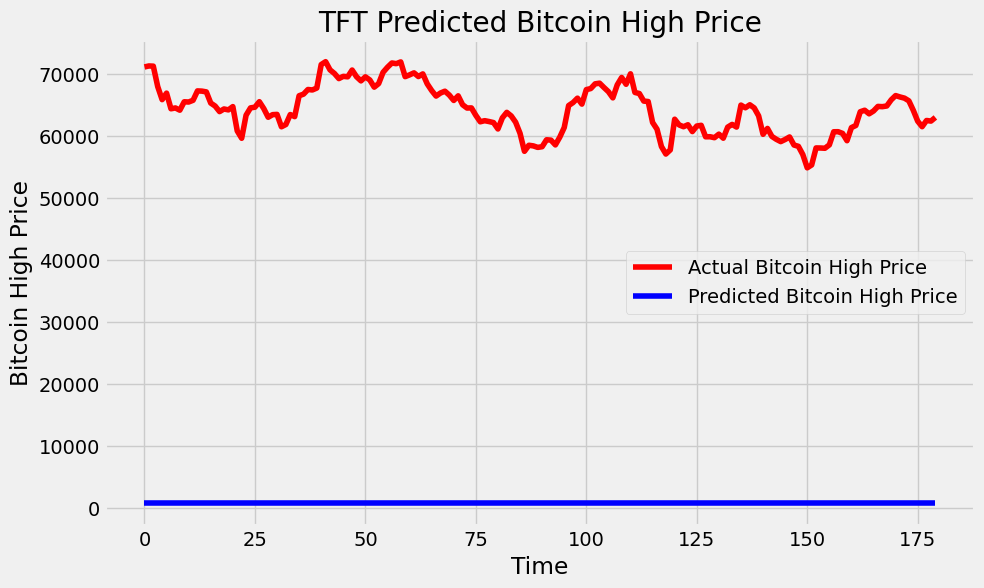

In [22]:
# Plot predictions vs actuals
plt.figure(figsize=(10, 6))
plt.plot(actuals, color='r', label='Actual Bitcoin High Price')
plt.plot(pred_df, color='b', label='Predicted Bitcoin High Price')
plt.title('TFT Predicted Bitcoin High Price')
plt.xlabel('Time')
plt.ylabel('Bitcoin High Price')
plt.legend()
plt.show()

In [23]:
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(actuals, pred_df))
print('TFT Root MSE = {}.'.format(rmse))

TFT Root MSE = 63613.410410069984.


In [24]:
# Save the model (optional)
tft.save("models/tft_model.h5")
print("TFT implementation complete. You can compare this with the LSTM model above.")

AttributeError: 'TemporalFusionTransformer' object has no attribute 'save'